### 移動平均(MA)與常見股票圖表繪製
References:
- [移動平均(MA)與常見股票圖表繪製](https://medium.com/r-%E8%AA%9E%E8%A8%80%E8%87%AA%E5%AD%B8%E7%B3%BB%E5%88%97/r%E8%AA%9E%E8%A8%80%E8%87%AA%E5%AD%B8%E6%97%A5%E8%A8%98-6-%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87-ma-%E8%88%87%E5%B8%B8%E8%A6%8B%E8%82%A1%E7%A5%A8%E5%9C%96%E8%A1%A8%E7%B9%AA%E8%A3%BD-86bd12e884a6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 移動平均（Moving Average）
- 過去$k$期的觀測值平均
- 常用以判斷趨勢
    - 觀察每期觀測值與它過去$k$期觀測值平均，可以判讀出每期觀測值相對於過去$k$期的趨勢
- 計算方式
    - $k$期移動平均 $MA(k) = \frac{\sum^k_{i=0} x_{t-i}}{k}$，$t$為當期觀測值的索引。

In [2]:
# 利用平移加總的方式計算 MA
def ma(X:pd.core.series.Series, k):
    return X.rolling(k).sum() / k

# 利用卷積的方式計算 MA
def ma(X:pd.core.series.Series, k, fill=True):
    X_mak = np.convolve(X, np.ones(k), 'valid') / k
    if fill:
        X_na = np.empty(k-1)
        X_na[:] = np.nan
        X_mak = np.concatenate((X_na, X_mak))
    return X_mak

,date,open,high,low,close,adj close,volume,ma5,ma20,ma60,ma120
0,2019-09-04,8.86,9.390,8.855,9.10,9.10,550700,NaN,NaN,NaN,NaN
1,2019-09-05,9.26,9.820,9.260,9.79,9.79,687200,NaN,NaN,NaN,NaN
2,2019-09-06,9.80,10.300,9.750,10.30,10.30,697400,NaN,NaN,NaN,NaN
3,2019-09-09,10.38,10.850,10.290,10.58,10.58,771800,NaN,NaN,NaN,NaN
4,2019-09-10,10.51,11.600,10.510,11.44,11.44,935800,10.242,NaN,NaN,NaN
5,2019-09-11,11.50,11.680,11.020,11.54,11.54,887200,10.730,NaN,NaN,NaN
6,2019-09-12,11.50,11.600,10.970,11.06,11.06,552500,10.984,NaN,NaN,NaN
7,2019-09-13,11.09,11.303,11.050,11.17,11.17,281700,11.158,NaN,NaN,NaN
8,2019-09-16,11.15,11.670,11.150,11.40,11.40,387600,11.322,NaN,NaN,NaN
9,2019-09-17,11.29,11.350,10.930,11.30,11.30,343900,11.294,NaN,NaN,NaN


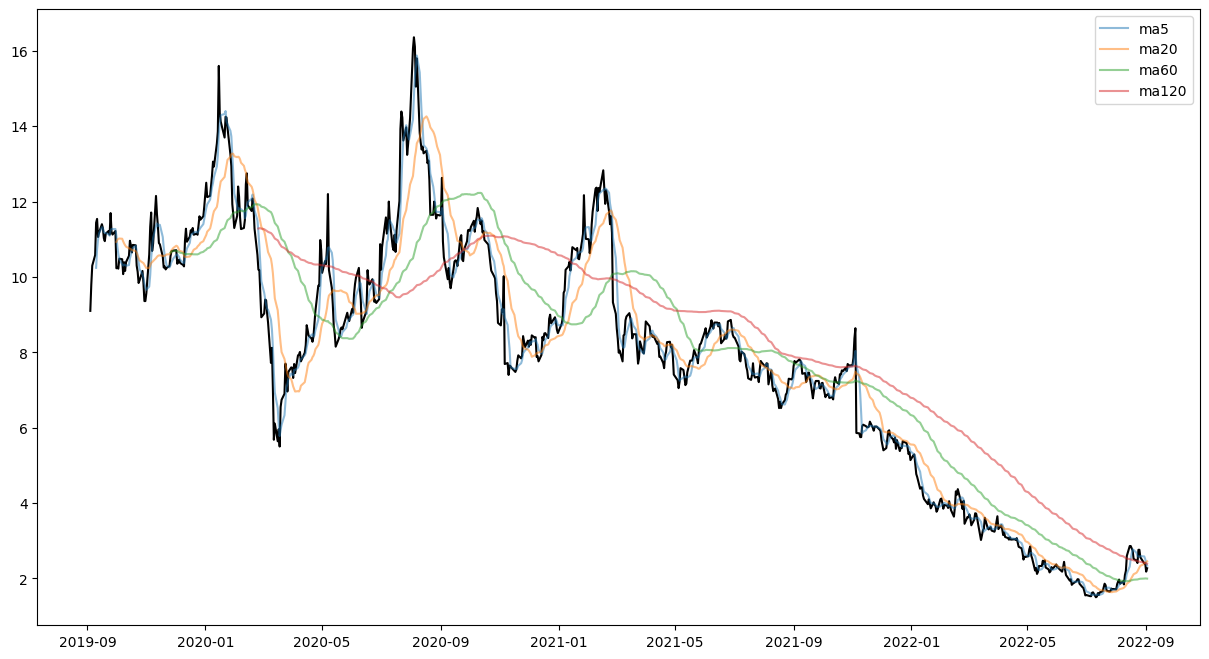

In [3]:
from cProfile import label
from turtle import color


data = pd.read_csv('../../data/AAOI.csv')
data = data.rename(columns={col:col.lower() for col in data.columns})
data['date'] = data['date'].astype('datetime64[ns]')

# 計算 MA 與製圖
plt.figure(figsize=(15,8))
plt.plot(data['date'], data['close'], color='black')
for k in [5, 20, 60, 120]:
    label = 'ma%d'%k
    data[label] = ma(data['close'], k)
    plt.plot(data['date'], data[label], label=label, alpha=0.5)
plt.legend()

data.head(10)

### K線圖（Candlestick Chart）
- K線圖是一種能匯總股價開收盤與最高最低價格的資訊，並一併視覺化呈現的圖。

,date,open,high,low,close,adj close,volume,ma5,ma20,ma60,ma120,growth
0,2019-09-04,8.86,9.39,8.855,9.10,9.10,550700,NaN,NaN,NaN,NaN,False
1,2019-09-05,9.26,9.82,9.260,9.79,9.79,687200,NaN,NaN,NaN,NaN,True
2,2019-09-06,9.80,10.30,9.750,10.30,10.30,697400,NaN,NaN,NaN,NaN,True
3,2019-09-09,10.38,10.85,10.290,10.58,10.58,771800,NaN,NaN,NaN,NaN,True
4,2019-09-10,10.51,11.60,10.510,11.44,11.44,935800,10.242,NaN,NaN,NaN,True


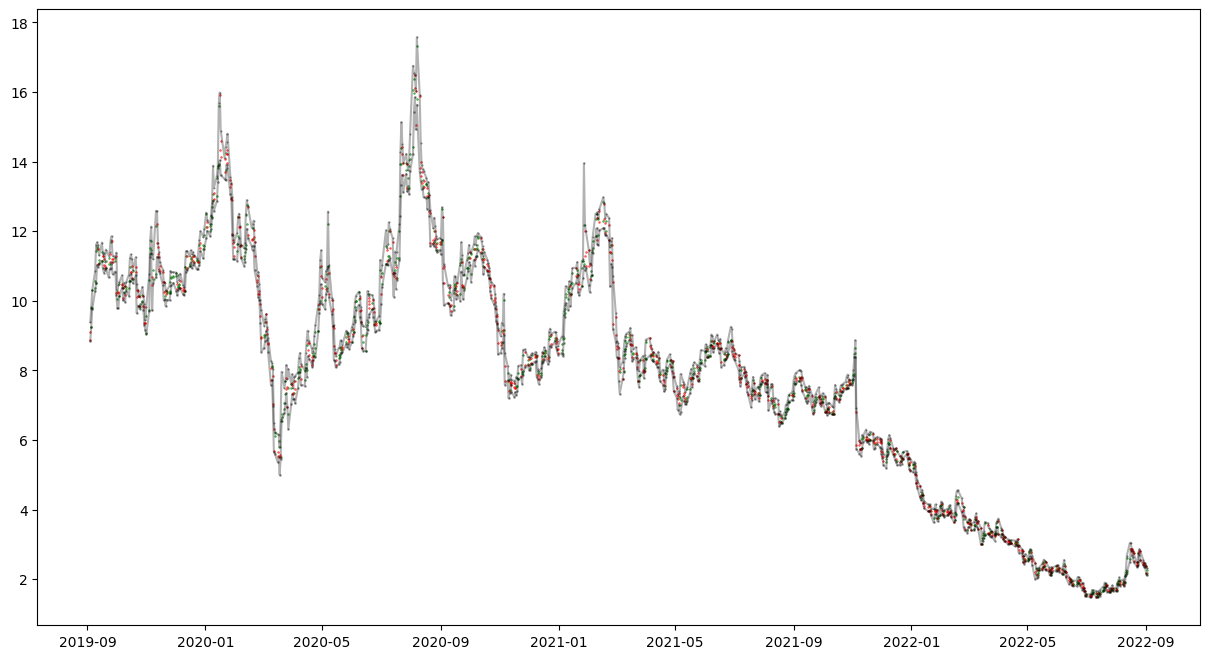

In [4]:
data['growth'] = data['close'].diff()
data['growth'] = data['growth'] > 0

plt.figure(figsize=(15,8))
rise_data =  data[['date', 'open', 'close']][data['growth']==True]
fail_data =  data[['date', 'open', 'close']][data['growth']==False]
for d, c in zip([rise_data, fail_data], ['green', 'red']):
    plt.scatter(d['date'], d['open'], c=c, marker='*', s=1, alpha=0.5)
    plt.scatter(d['date'], d['close'], c=c, marker='*', s=1, alpha=0.5)

plt.plot(data['date'], data['low'], color='black', marker='o', alpha=0.3, markersize=1)
plt.plot(data['date'], data['high'], color='black', marker='*', alpha=0.3, markersize=1)

data.head()